# Mentoría 'de cómo clasificar en géneros a las canciones'
## Práctico I : Análisis de features de audio

**Consideraciones:**
- Se evalúa el estilo y prolijidad del código.
- Se permite hacer trabajo extra, siempre y cuando las actividades básicas estén resueltas.

### Librerías

In [1]:
!pip3 install spotipy
!pip3 install pandas

# Agregar las librerías extra que se utilicen en esta celda y la siguiente

### Dependencias y acceso al API

In [243]:
import pandas as pd
import numpy as np
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import seaborn as sns
import matplotlib.pyplot as plt


client_id = '46b333d567314a89a6254b6c6b054be6'
client_secret = '9d922c3613e441518349dcf55f7d5853'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
#dir(sp)

In [248]:
sns.set_context(context='paper')

### 1) Plantear una pregunta que quieran responder con estos datos

Las preguntas pueden ser por ejemplo: 
- ¿Por qué este artista destaca dentro de su género?
- ¿Por qué no lo hace?
- ¿Por qué un género musical es más escuchado que otro?

Sin embargo, pueden usar cualquier afirmación que hayan leído en internet y que se pueda responder con los datos este trabajo para validarla o rechazarla.

### Pregunta: Qué tan bien representan las features de audio de Spotify las características de canciones experimentales?

- Cómo se comportan las features ante la música experimental? Son capaces de representar lo que se escucha o dan resultados erróneos?



### 2) Obtener datos para responder la pregunta

Para esto hay que hacer pedidos a la API para obtener una lista de canciones de sus artistas, de las cuáles se obtienen sus features de audio como en este [ejemplo](https://developer.spotify.com/console/get-audio-features-track/?id=17VP4tofJ3evJbtY8Tk1Qi) de la versión web de la API. Una vez obtenidos los datos, seleccionar un subconjunto de 5 o 6 features de audio y agrupar los datos en un [DataFrame de pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

**Recomendación** : Usar un dataframe para su artista y otro para la competencia si es que eligierone esa opción, les va a ahorrar tiempo.

**Aclaración** : Si plantearon una pregunta que no requiera los datos de la consigna, obtengan esos datos.

Primero algunas funciones auxiliares

In [3]:
def genres_by_artist_id(id): #id: str
    artist = sp.artist(id)
    genres = artist['genres']
    return genres    #genres: List[str]

def songs_from_album_id(album_id): #album_id : str
    songs = []
    album = sp.album(album_id)
    for i in range(album['total_tracks']):
        track = {}
        track["song_name"] = album['tracks']['items'][i]['name']
        track["song_id"] = album['tracks']['items'][i]['id']
        track["album_name"] = album['name']
        track["album_id"] = album["id"]
        songs.append(track)
    return songs    #songs:List[dict]

def add_track(track_id, songs): #track_id:str, songs:List[dict]
    track = sp.track(track_id)
    audio_features = sp.audio_features(track_id)
    row = {}
    row["song_name"] = track['name']
    row["song_id"] = track['id']
    row["album_name"] = track['album']['name']
    row["album_id"] = track['album']['id']
    row["audio_features"] = audio_features[0]
    songs.append(row)
    return songs



Armamos el dataset.

Canciones: mother of the world, 30 red houses, Hunting down individual mosquitoes, 
            Oral couture, Turbo Olé, Ceaseless Suffering, 
            The Wolf, Aorta, Declare Independence,
            sin rumbo, Anger, Soichiro,
            No Love, Hunger Games, Double Helix,
            Hacker, Black paint, Visceras,
            Micro, 1 hour white noise, Peg,
            Alice, Woodpecker No 1, Tokyo times ten,
            Data.Duplex, Data.Syntax, 5 movements for string quartet, op.5: 1.heftig bewegt,
            Pierrot Lunaire, Op. 21:VIII. Die Nacht, Metastaseis, Horses,
            Heavy Water/I'd rather be sleeping
            

In [4]:

dataset = []
tracks = ["5zNQPB67iLm11Zyg6hwiQX","1X8VjdoPONsFDepJcmvz3E","26pTHO6oeJwjacJFhDzqVl",
          "6ZzpYaAQVvRKwFtMej9OEM","5ecFLLkXuMdZgLYihUfFGk", "2eL3QVjeJF9KhpYkVxjLUA",
          "1YJ264vuusaeDpbe8BKpBP", "0UxLfXmjXU5qoRFL25n5lA", "7gy9d7iBHW9BWhMNPjHuFf",
          "0aL27vskbMpwsMGUkHm3Zf", "1QofoyawKCfWd5lZXwE02k", "4zsfqkM7X1ZYcMAXpGkOO5",
          "5fDj1YVNR04RtQNP4iYapO", "3Pt8XN6zWFmW2ShLna8Ttb", "2SWHZzjaqBuWYUUuxjdeBG",
          "7y8X0Z04gJCKtfrnSAMywJ", "2yY0LXGpN7U2y5tbagNnXq", "1IDi1OjPT8y7MmNflRYMHO",
          "32IPwbBBWJzubJAAZeVx0x", "7Ipe9FfRceDN51YMyd99pO", "2DYxoQbcgjuduAYb98SVLj",
          "7n6WNQidHGzHm0TQHWV7aH", "4UO1pfxi5fDbxshrwwznJ2", "2GgN9rZOpMMGoGVxK9jRxf",
          "6f41Dmik9o6ByGCCe6AJR1", "1C811u2Eqsp6IWki8HyIJC", "5xFWfrJXy7WLdNrioyjUmt",
          "7oTjhU3qCmmXxGR3zi5H2L", "1efDBHuz4k6Zei6chsAwfq", "3e20AQb9sMo23KokSqBrBY",
          "6IUwiHsyKAZtfBy37Wu4ij",
         ]
track_2 = ["5zNQPB67iLm11Zyg6hwiQX","1X8VjdoPONsFDepJcmvz3E","26pTHO6oeJwjacJFhDzqVl",
          "6ZzpYaAQVvRKwFtMej9OEM","5ecFLLkXuMdZgLYihUfFGk", "2eL3QVjeJF9KhpYkVxjLUA",
          ]
for track in tracks:
    add_track(track, dataset)
dataset

[{'album_id': '774XM9c4BAxkNqvu7Rea1E',
  'album_name': 'The Seer',
  'audio_features': {'acousticness': 0.0323,
   'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5zNQPB67iLm11Zyg6hwiQX',
   'danceability': 0.305,
   'duration_ms': 597253,
   'energy': 0.79,
   'id': '5zNQPB67iLm11Zyg6hwiQX',
   'instrumentalness': 0.368,
   'key': 9,
   'liveness': 0.153,
   'loudness': -9.633,
   'mode': 1,
   'speechiness': 0.0965,
   'tempo': 139.551,
   'time_signature': 3,
   'track_href': 'https://api.spotify.com/v1/tracks/5zNQPB67iLm11Zyg6hwiQX',
   'type': 'audio_features',
   'uri': 'spotify:track:5zNQPB67iLm11Zyg6hwiQX',
   'valence': 0.383},
  'song_id': '5zNQPB67iLm11Zyg6hwiQX',
  'song_name': 'Mother of the World'},
 {'album_id': '3aYI83u5Fx5ZRk66jv5QBx',
  'album_name': 'The Light Is Leaving Us All',
  'audio_features': {'acousticness': 0.905,
   'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1X8VjdoPONsFDepJcmvz3E',
   'danceability': 0.727,
   'duration_ms': 199

Armamos los dataframes

In [61]:
songs = pd.DataFrame(dataset)
audio_features_base = pd.DataFrame(list(songs["audio_features"].values))

In [93]:
description_base = audio_features_base.describe()
description_base


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,31.000000,31.000000,3.100000e+01,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,0.348903,0.427052,4.087277e+05,0.578963,0.428008,5.677419,0.179181,-11.492548,0.741935,0.120710,118.905419,3.903226,0.244329
std,0.383779,0.204478,6.278487e+05,0.346732,0.428033,3.798132,0.150501,9.277614,0.444803,0.103448,30.737752,0.472923,0.246081
min,0.000026,0.084600,5.342700e+04,0.000066,0.000000,0.000000,0.041200,-33.952000,0.000000,0.028300,68.404000,3.000000,0.000010
25%,0.009585,0.263500,1.731885e+05,0.279000,0.000280,1.000000,0.098650,-17.809500,0.500000,0.042650,99.579500,4.000000,0.039700
50%,0.146000,0.486000,2.503860e+05,0.709000,0.291000,7.000000,0.120000,-8.960000,1.000000,0.072600,118.001000,4.000000,0.101000
75%,0.753000,0.562500,4.092555e+05,0.876500,0.877000,9.000000,0.202000,-5.902000,1.000000,0.148000,136.384500,4.000000,0.513000
max,0.950000,0.823000,3.631718e+06,0.998000,1.000000,11.000000,0.674000,4.140000,1.000000,0.402000,184.102000,5.000000,0.738000


[{'speechiness': "Heavy Water/I'd Rather Be Sleeping"},
 {'instrumentalness': '30 Red Houses'},
 {'danceability': 'Alice'},
 {'valence': 'White Noise 1 Hour Long'},
 {'tempo': 'Metastaseis'},
 {'energy': 'White Noise 1 Hour Long'}]

From the available features to analyse, I chose (quoted phrases from [spotify's documentation](https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/)):

- **energy**: [float] "Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy."

- **tempo**: [float] "The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration."

- **valence**: [float] "A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)."

- **danceability**: [float] "Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable." That means we can interpret danceability as **regularity** in the context of experimental music.

- **instrumentalness**: [float] "Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0."

- **speechiness**: [float] "Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks."

In [59]:
features = ["speechiness", "instrumentalness", "danceability", "valence","tempo", "energy"]

### 3) Hacer un gráfico de estilo [radar chart](https://en.wikipedia.org/wiki/Radar_chart)  comparando a su artista o banda con 'la competencia'
En esta parte tienen que hacer los gráficos tomando como parámetros las features de audio que eligieron. Pueden usar la librería que quieran para hacer los gráficos.

**Recomendaciones** : 
- Hacer ambos gráficos en una misma figura.
- Antes de graficar, obtener los valores medios o medianos para los valores de las features. 
- Chequear los rangos de valores para cada feature antes de hacer los gráficos.

**Aclaración**: pueden usar otro tipo de gráfico si lo consideran particularmente útil para resolver su pregunta.

First we calculate the ranges of the audio features

In [95]:
ranges_base = pd.concat([pd.DataFrame(description_base.loc['max']),pd.DataFrame(description_base.loc['min'])],axis=1)
ranges_base

,max,min
acousticness,0.950,0.000026
danceability,0.823,0.084600
duration_ms,3631718.000,53427.000000
energy,0.998,0.000066
instrumentalness,1.000,0.000000
key,11.000,0.000000
liveness,0.674,0.041200
loudness,4.140,-33.952000
mode,1.000,0.000000
speechiness,0.402,0.028300


Let's keep the features we will analyse only

In [118]:
audio_features = audio_features_base[features]
ranges = ranges_base.loc[features]
description = description_base[features]
description

,speechiness,instrumentalness,danceability,valence,tempo,energy
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,0.120710,0.428008,0.427052,0.244329,118.905419,0.578963
std,0.103448,0.428033,0.204478,0.246081,30.737752,0.346732
min,0.028300,0.000000,0.084600,0.000010,68.404000,0.000066
25%,0.042650,0.000280,0.263500,0.039700,99.579500,0.279000
50%,0.072600,0.291000,0.486000,0.101000,118.001000,0.709000
75%,0.148000,0.877000,0.562500,0.513000,136.384500,0.876500
max,0.402000,1.000000,0.823000,0.738000,184.102000,0.998000


In [135]:
#aux functions
def track_by_feature(feature, value):
    track_id = audio_features_base[audio_features_base[feature]==value]['id']
    track_id = track_id.values.item(0)
    return songs[songs['song_id']== track_id]
#example use: 
#track_by_feature("acousticness",0.950000)
#track_by_feature("liveness",0.041200)

def songs_of_description(statistic):
    row = description.loc[statistic]
    keys = row.keys()
    tracks_of_row = []
    for key in keys:
        track = track_by_feature(key,row[key]).to_dict()['song_name']
        track = list(track.values())[0]
        tracks_of_row.append({key: track})
    return tracks_of_row


Let's see which songs had the hightest and the lowest scores

In [134]:
songs_of_description("min")

[{'speechiness': "Heavy Water/I'd Rather Be Sleeping"},
 {'instrumentalness': '30 Red Houses'},
 {'danceability': 'Alice'},
 {'valence': 'White Noise 1 Hour Long'},
 {'tempo': 'Metastaseis'},
 {'energy': 'White Noise 1 Hour Long'}]

In [133]:
songs_of_description("max")

[{'speechiness': 'Anger'},
 {'instrumentalness': 'White Noise 1 Hour Long'},
 {'danceability': 'Peg'},
 {'valence': 'Horses'},
 {'tempo': 'Vísceras'},
 {'energy': 'Woodpecker No. 1'}]

Let's see how the songs' features are **distributed**

<Figure size 1080x720 with 0 Axes>

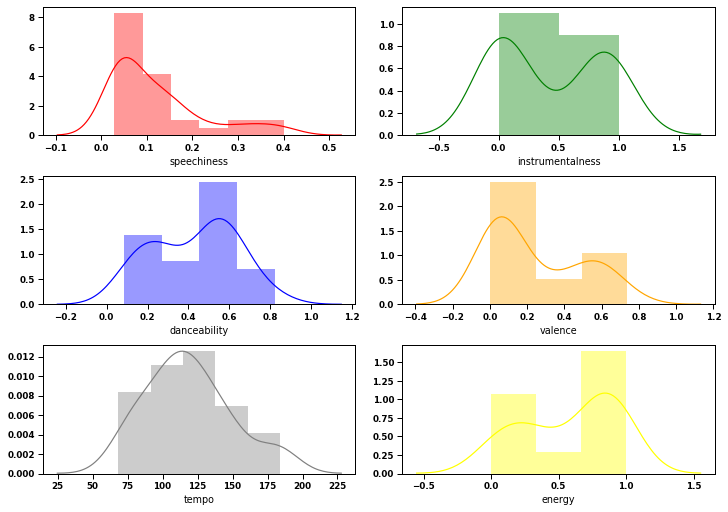

In [265]:
plt.figure(figsize=(15, 10))
fig, ax =plt.subplots(3,2,constrained_layout=True, figsize=(10,7))
sns.distplot(audio_features["speechiness"],ax=ax[0,0],color="red")
sns.distplot(audio_features["instrumentalness"],ax=ax[0,1],color="green")
sns.distplot(audio_features["danceability"],ax=ax[1,0],color="blue")
sns.distplot(audio_features["valence"],ax=ax[1,1],color="orange")
sns.distplot(audio_features["tempo"],ax=ax[2,0],color="grey")
sns.distplot(audio_features["energy"],ax=ax[2,1],color="yellow")

We can see that given a song of the dataset, there's a high probability that the song:
* will rank low on the **valence** score, meaning spotify classifies it as sad/depressive/negative;
* its **energy** will be catalogued as high, meaning it is probably entropic, loud;
* not be considered **speechy**, its low value meaning it will be music not predominently vocal (like rap, etc)

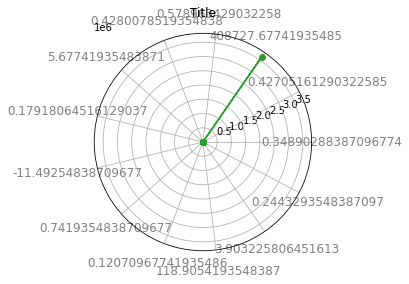

In [120]:
df = description_base.loc[['mean','max']].transpose()
fig = plt.figure()
ax = fig.add_subplot(111, projection="polar")

# theta has 5 different angles, and the first one repeated
theta = np.arange(len(df) + 1) / float(len(df)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = df['max'].values
values = np.append(values, values[0])

# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, values, color="C2", marker="o", label="max")
plt.xticks(theta[:-1], df['mean'], color='grey', size=12)
ax.tick_params(pad=10) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)

# plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("Title")
plt.show()

### 4) Escribir un informe

Este informe tiene que describir qué datos que obtuvieron, el volumen de estos (# de canciones del artista, # de canciones de la competencia, etc), una explicación de cómo estos se relacionan con la pregunta planteada, cómo ayudan a responderla y los resultados que obtuvieron. Usar la celda de abajo con formato markdown.




In [151]:
genres_by_artist_id("7JRs0G0kHZTBs0Lo7qOjL8")

['nu gaze', 'one-person band', 'quebec indie']

### Pregunta: ¿Qué tan bien representan las features de audio de Spotify las características de canciones experimentales?

- Cómo se comportan las features ante la música experimental? Son capaces de representar lo que se escucha o dan resultados erróneos?

Para esto armé un dataset pequeño con 30 canciones seleccionadas a mano, buscando representar distintos tipos de experimentación en lo sonoro. Elegí el tamaño del dataset ya que para comparar cada canción con las features hay que escucharlas a todas.
Entre las canciones hay cosas como
* Ruido blanco
* Música dedacofónica y Serialista
* Noise y Harsh Noise (Merzbow)
* indie (dirty beaches,
* drone, avant-garde metal,atmospheric black metal ( Sun 0))), The angelic process, Swans )
* Música predominantemente vocal, throat singing (Tanya Tagaq)
* experimental electronic (JASSS, Contrafacto)
* art pop, Experimental pop (Arca)
* synth punk (Deli girls)
* Música minimal (Ryoji Ikeda)
* Ambient (Rainforest Spiritual Enslavement, Worms of the earth)

Sun 0))) Monoliths and Dimensions


In [100]:
#https://open.spotify.com/artist/70MMkLXtue3Edj3RJhJkYp
genres_by_artist_id("7vF3DcPluq6lZI36VniagW")
#https://open.spotify.com/track/1X8VjdoPONsFDepJcmvz3E?si=zMqXD0gNTR6_IRF_0lqSew
sp.audio_features("1X8VjdoPONsFDepJcmvz3E")

[{'acousticness': 0.905,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1X8VjdoPONsFDepJcmvz3E',
  'danceability': 0.727,
  'duration_ms': 199707,
  'energy': 0.329,
  'id': '1X8VjdoPONsFDepJcmvz3E',
  'instrumentalness': 0,
  'key': 4,
  'liveness': 0.0687,
  'loudness': -8.96,
  'mode': 0,
  'speechiness': 0.0375,
  'tempo': 109.019,
  'time_signature': 3,
  'track_href': 'https://api.spotify.com/v1/tracks/1X8VjdoPONsFDepJcmvz3E',
  'type': 'audio_features',
  'uri': 'spotify:track:1X8VjdoPONsFDepJcmvz3E',
  'valence': 0.158}]